In [17]:
import cv2
import matplotlib.pyplot as plt

In [18]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt" # configuration for model
frozen_model = "frozen_inference_graph.pb" # trained machine learning model

In [19]:
model = cv2.dnn_DetectionModel(frozen_model, config_file) # creaign instance of deep neural network model

In [20]:
classLabels = []
# using coco dataset
# coco dataset has 80 classes
with open ('labels.txt', 'rt') as f:
    classLabels = f.read().rstrip('\n').split('\n')

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [21]:
model.setInputSize(320, 320) # size of the new frame and shape
model.setInputScale(1.0/127.5) # multiplier for the frame value
model.setInputMean((127.5, 127.5, 127.5)) # set mean value for the frame
model.setInputSwapRB(True) # set flag swap RB for every frame

< cv2.dnn.Model 0x7be3081f98f0>

In [22]:
img = cv2.imread("car_man.jpeg")

In [23]:
# confThreshold -> for accuracy
classIndex, confidece, bbox  = model.detect(img, confThreshold=0.5)

# Detect Object in Image

In [24]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd,  boxes in zip(classIndex.flatten(), bbox):
    # create reactangle 
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    # add object text 
    cv2.putText(img, classLabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

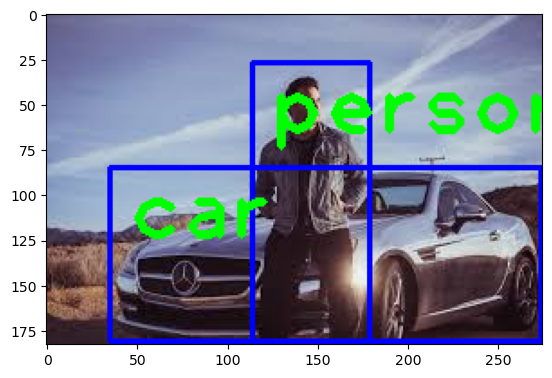

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Detect Object in Video

In [29]:
video = cv2.VideoCapture('video.mp4')

# Check if video is loaded or not
if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("cannot open video")
  
font_scale = 3
# font Type
font = cv2.FONT_HERSHEY_PLAIN

# Run video frame by frame
while True:
    ret, frame = video.read()
    
    classIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    
    # detect object in each frame
    if(len(classIndex) != 0):
        
        for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if(classInd <= 80):
                # create reactangle 
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                # add object text  
                cv2.putText(frame, classLabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow("Object Detection", frame)
    
    # press q to exit the loop
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
video.release()
cv2.destroyAllWindows()
                

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread (0x3e936c0).
Cannot move to target thread (0x6c0a8e0)

QObject::moveToThread: Current thread (0x6c0a8e0) is not the object's thread